<hr>

# IMPACT OF DROPOUT

**Question 1**
- What happens if you change the dropout probabilities for the first and second layers?
- In particular, what happens if you switch the ones for both layers?

Design an experiment to answer these questions, describe your results quantitatively, and summarize the qualitative takeaways.

**Question 2**
- Why is dropout not typically used at test time?

<hr>

# QUESTION 1

### Importing libraries and Loading the dataset

In [ ]:
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential

import numpy as np, pandas as pd, matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve

In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Scaling and Pre-Processing

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

(48000, 28, 28)
(48000,)
(12000, 28, 28)
(12000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train = x_train / 255.0,
x_val = x_val / 255.0,
x_test = x_test / 255.0

### Defining various Neural Network Architectures

1. **Without any Dropout**

In [ ]:
model1 = Sequential()

model1.add(Flatten(input_shape=(28, 28), name="flatten1"))
model1.add(Dense(128, 'relu', name='hidden1'))
model1.add(Dense(64, 'relu', name='hidden2'))
model1.add(Dense(10, 'softmax', name='output'))

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model1.summary())

history1 = model1.fit(x_train, y_train, epochs = 20, validation_data=(x_val, y_val))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten1 (Flatten)          (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 128)               100480    
                                                                 
 hidden2 (Dense)             (None, 64)                8256      
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2666 - accuracy: 0.9214 - val_loss: 0.1577 - val_accuracy: 0.9538

2. **With Dropout - Configuration 1:** High dropout (e.g., 0.5) in the first layer, low dropout (e.g., 0.2) in the second layer

In [ ]:
model2 = Sequential()

model2.add(Flatten(input_shape=(28, 28), name="flatten1"))
model2.add(Dense(128, 'relu', name='hidden1'))
model2.add(Dropout(0.5))
model2.add(Dense(64, 'relu', name='hidden2'))
model2.add(Dropout(0.2))
model2.add(Dense(10, 'softmax', name='output'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model2.summary())

history2 = model2.fit(x_train, y_train, epochs = 20, validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten1 (Flatten)          (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 hidden2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109

3. **With Dropout - Configuration 2:** Low dropout in the first layer, high dropout in the second layer.

In [ ]:
model3 = Sequential()

model3.add(Flatten(input_shape=(28, 28), name="flatten1"))
model3.add(Dense(128, 'relu', name='hidden1'))
model3.add(Dropout(0.2))
model3.add(Dense(64, 'relu', name='hidden2'))
model3.add(Dropout(0.5))
model3.add(Dense(10, 'softmax', name='output'))

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model3.summary())

history3 = model3.fit(x_train, y_train, epochs = 20, validation_data=(x_val, y_val))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten1 (Flatten)          (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 hidden2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109

### Quantitative Analysis of the architectures

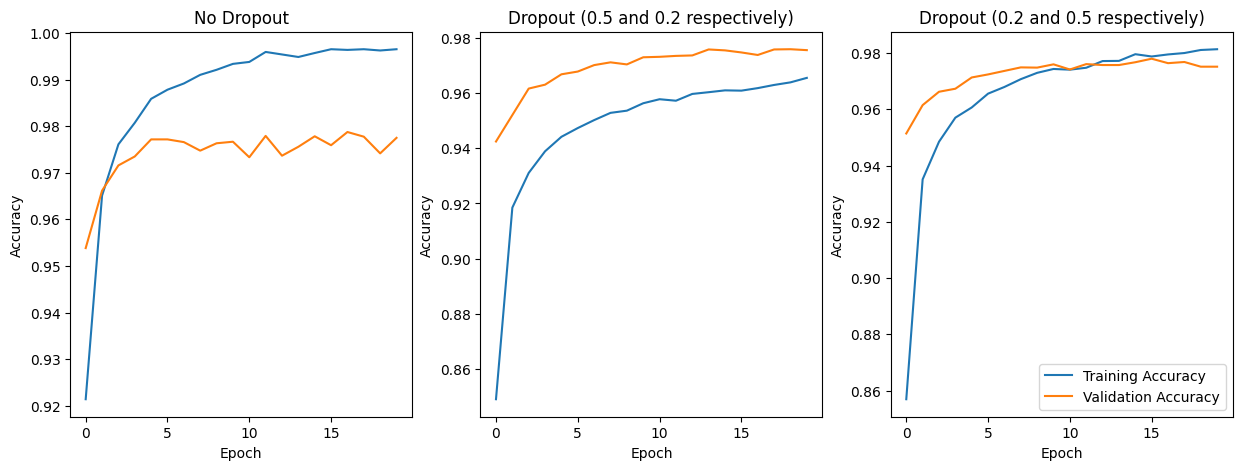

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('No Dropout')
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')

plt.subplot(1, 3, 2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Dropout (0.5 and 0.2 respectively)')
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')

plt.subplot(1, 3, 3)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Dropout (0.2 and 0.5 respectively)')
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')

plt.legend()
plt.show()

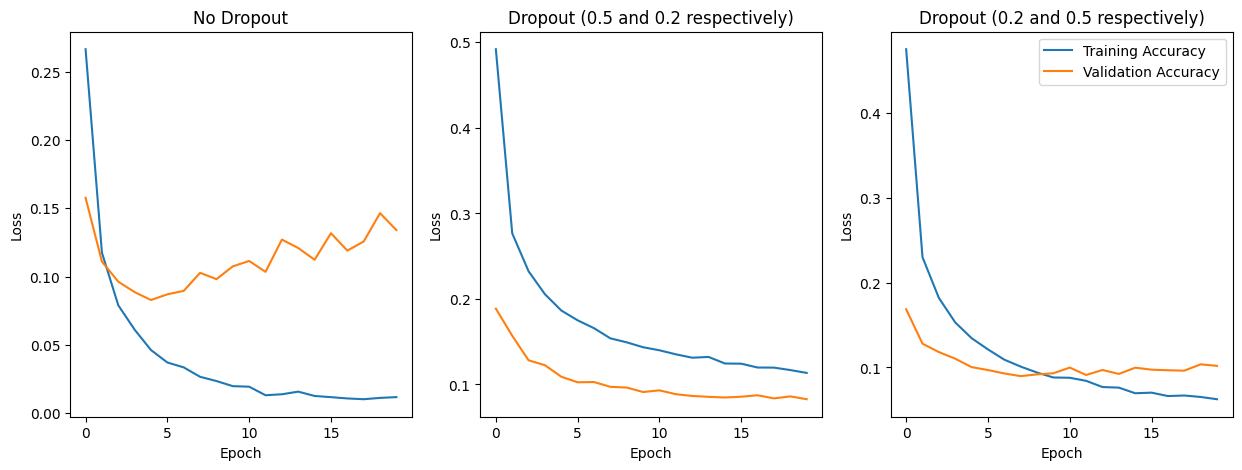

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('No Dropout')
plt.plot(history1.history['loss'], label='Training Accuracy')
plt.plot(history1.history['val_loss'], label='Validation Accuracy')

plt.subplot(1, 3, 2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Dropout (0.5 and 0.2 respectively)')
plt.plot(history2.history['loss'], label='Training Accuracy')
plt.plot(history2.history['val_loss'], label='Validation Accuracy')

plt.subplot(1, 3, 3)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Dropout (0.2 and 0.5 respectively)')
plt.plot(history3.history['loss'], label='Training Accuracy')
plt.plot(history3.history['val_loss'], label='Validation Accuracy')

plt.legend()
plt.show()

In [ ]:
preds1 = np.argmax(model1.predict(x_test), axis=1)
preds2 = np.argmax(model2.predict(x_test), axis=1)
preds3 = np.argmax(model3.predict(x_test), axis=1)

print('TESTING ACCURACIES')

print("ACCURACY CASE 1 : ", accuracy_score(y_test, preds1))
print("ACCURACY CASE 2 : ", accuracy_score(y_test, preds2))
print("ACCURACY CASE 3 : ", accuracy_score(y_test, preds3))

313/313 [==============================] - 1s 2ms/step
TESTING ACCURACIES
ACCURACY CASE 1 :  0.9779
ACCURACY CASE 2 :  0.976
ACCURACY CASE 3 :  0.9778


### Takeaways and Inferences

We can clearly see that Dropout solves the issue of overfitting in a great manner. Overfitting occurs when our validation accuracy is lesser than our training accuracy. Training accuracy might be high, however model won't perfom that well for the validation data.


- We can clearly see that although overall both training and validation accuracy is quite high, the validation accuracy in case of 'no dropout' is lesser in comparison to training accuracy, indicating slight overfitting.
- Using dropouts decreased overfitting.

**Comparison between the two dropouts architectures :**
- In both the cases, overfitting was reduced. Training accuracy in comparison to no-dropout approach was slightly lesser, but the validation accuracy was much more closer to training accuracy.
- The gap between training and validation accuracy reduced.
- The reduction in overfitting was **better in configuration 2**.

In configuration two, **convergence was observed around 10th epoch**.

This was the result for this dataset. Results vary from datasets to datasets and also with change dropout rates.

That is why there is no hard and fast rule that higher dropout rate in previous layer or vice-versa is better.

**Why is Configuration 2 better than Configuration 1 (both, with Dropouts)?**

- Configuration 2 shows consistent improvement in loss and accuracy, reaching a final training accuracy of 0.9814 with a training loss of 0.0625. However, Configuration 1 also improves steadily but ends with a higher final training loss (0.1135) and slightly lower training accuracy (0.9655).

- Both configurations achieve similar final validation accuracy, however, configuration 2 shows *convergence* at a point, after which it's training accuracy is boosted. And hence, configuration 2 ends up training with slightly higher accuracy than configuration.


<hr>

# QUESTION 2

Dropout is not typically used during the testing phase for the following reasons:

- Applying dropout during testing would introduce **randomness** in the predictions, making them inconsistent and less reliable.

- During inference, the model is not being trained or updated.

- During training, **dropout scales down the activations** of the remaining neurons to maintain the same expected output. However, during testing, this scaling is not applied, as all neurons are active. Therefore, simply applying dropout during testing without the scaling factor could lead to inflated predictions.

Therefore, During testing, dropout is not applied to ensure consistent and deterministic predictions on new data. Using dropout during testing would lead to inconsistent and unreliable predictions due to the introduced randomness. Dropout is a training-time technique aimed at regularization, and its use during testing would hinder inference efficiency and model interpretability.

<br>
<hr ><hr>